In [1]:
import numpy as np
from stdb import load_db 
import pygmt
import pandas as pd
import pickle
import glob, os
import warnings  
from obspy.core.event.catalog import read_events
warnings.filterwarnings("ignore")  

In [2]:
pygmt.config(FONT_ANNOT_PRIMARY = '10p,Times-Roman',
            FONT_LABEL = '8',
            MAP_LABEL_OFFSET = '4p',
            MAP_TICK_LENGTH_PRIMARY = '5p',
#             PS_MEDIA ='A4',
            PROJ_LENGTH_UNIT = 'c',
            MAP_ANNOT_OFFSET_PRIMARY = '5p',
            MAP_ANNOT_OFFSET_SECONDARY = '5p',
            MAP_FRAME_TYPE = 'fancy',
            MAP_FRAME_WIDTH = 'auto',
            FORMAT_GEO_MAP = 'D',
            PS_CHAR_ENCODING = 'Standard+',
            MAP_FRAME_PEN = '2p,black')


def PygmtBegin(figmap, region):
#     grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
    pygmt.makecpt(cmap="elevation", series=[0, 4000, 500],output = 'eleva.cpt', continuous=True)
    figmap.basemap(region=region, projection="M15c", frame = ['x1f0.5', 'y1f0.5', 'nSeW'])
    figmap.grdimage('@earth_relief_30s',region =region, cmap="eleva.cpt",monochrome=True, shading=True, transparency=50)
    figmap.coast(resolution = 'h', shorelines ='1/thinnest,black', water='white', borders = '1/0.25p')
##==========legned setting 
    figmap.plot(x=40.5,y=39.1,style="c0.5c", pen="black", no_clip=True)
    figmap.text(x=40.5,y=38.9,text='Null', font="12p,Times-Bold,black", no_clip=True)
    RCdata = [[41.5, 39.1, 0, 5, 1*40]]
    SCdata = [[41.5, 38.9, 0, 5, 1*40]]
    figmap.plot(data=RCdata, style="J", color="deepskyblue1", pen="0.01p,black", no_clip=True)
    figmap.text(x=42,y=39.1,text='RC', font="12p,Times-Bold,black", no_clip=True)
    figmap.plot(data=SCdata, style="J", color="red3", pen="0.01p,black", no_clip=True)
    figmap.text(x=42,y=38.9,text='SC', font="12p,Times-Bold,black", no_clip=True)
    legenddata=[[43, 39.1, 0, 5, 0.5*40],[43.8, 39.1, 0, 5, 1*40],[44.8, 39.1, 0, 5, 1.5*40]]
    figmap.plot(data=legenddata, style="J", color="black", pen="0.01p,black", no_clip=True)
    figmap.text(x=43,y=38.9,text='0.5s', font="12p,Times-Bold,black", no_clip=True)
    figmap.text(x=43.8,y=38.9,text='1s', font="12p,Times-Bold,black", no_clip=True)
    figmap.text(x=44.8,y=38.9,text='1.5s', font="12p,Times-Bold,black", no_clip=True)
     

In [10]:
PKLpath = '/Volumes/home/Research/STEP/01_Split'
DATApath = '/Volumes/home/Research/STEP/02_Station_result_csv/2010-2020_*_classify'
method = 'SC'

AB.GANJ
AB.QZX
AB.ZKT
AM.ALAV
AM.ARZA
AM.BAUR
AM.BYUR
AM.GERK
AM.KECH
AM.LICH
AM.MAGY
AM.NAVR
AM.SHEN
AM.TSAP
AM.VAND
AM.ZARN
GO.AKH
GO.BGD
GO.CHVG
GO.DGRG
GO.GUDG
GO.ONI
GO.SEAG
GO.TBLG
GO.TRLG
II.KIV
IU.GNI
KO.BCA
KO.TASB
TG.ABST
TG.AMBR
TG.AZMN
TG.BATM
TG.BKRG
TG.BRNG
TG.BURN
TG.DDFL
TG.DMNI
TG.GANZ
TG.GUDA
TG.KHVA
TG.KZRT
TG.LGD
TG.TKBL
TG.TRLT
TG.URAV


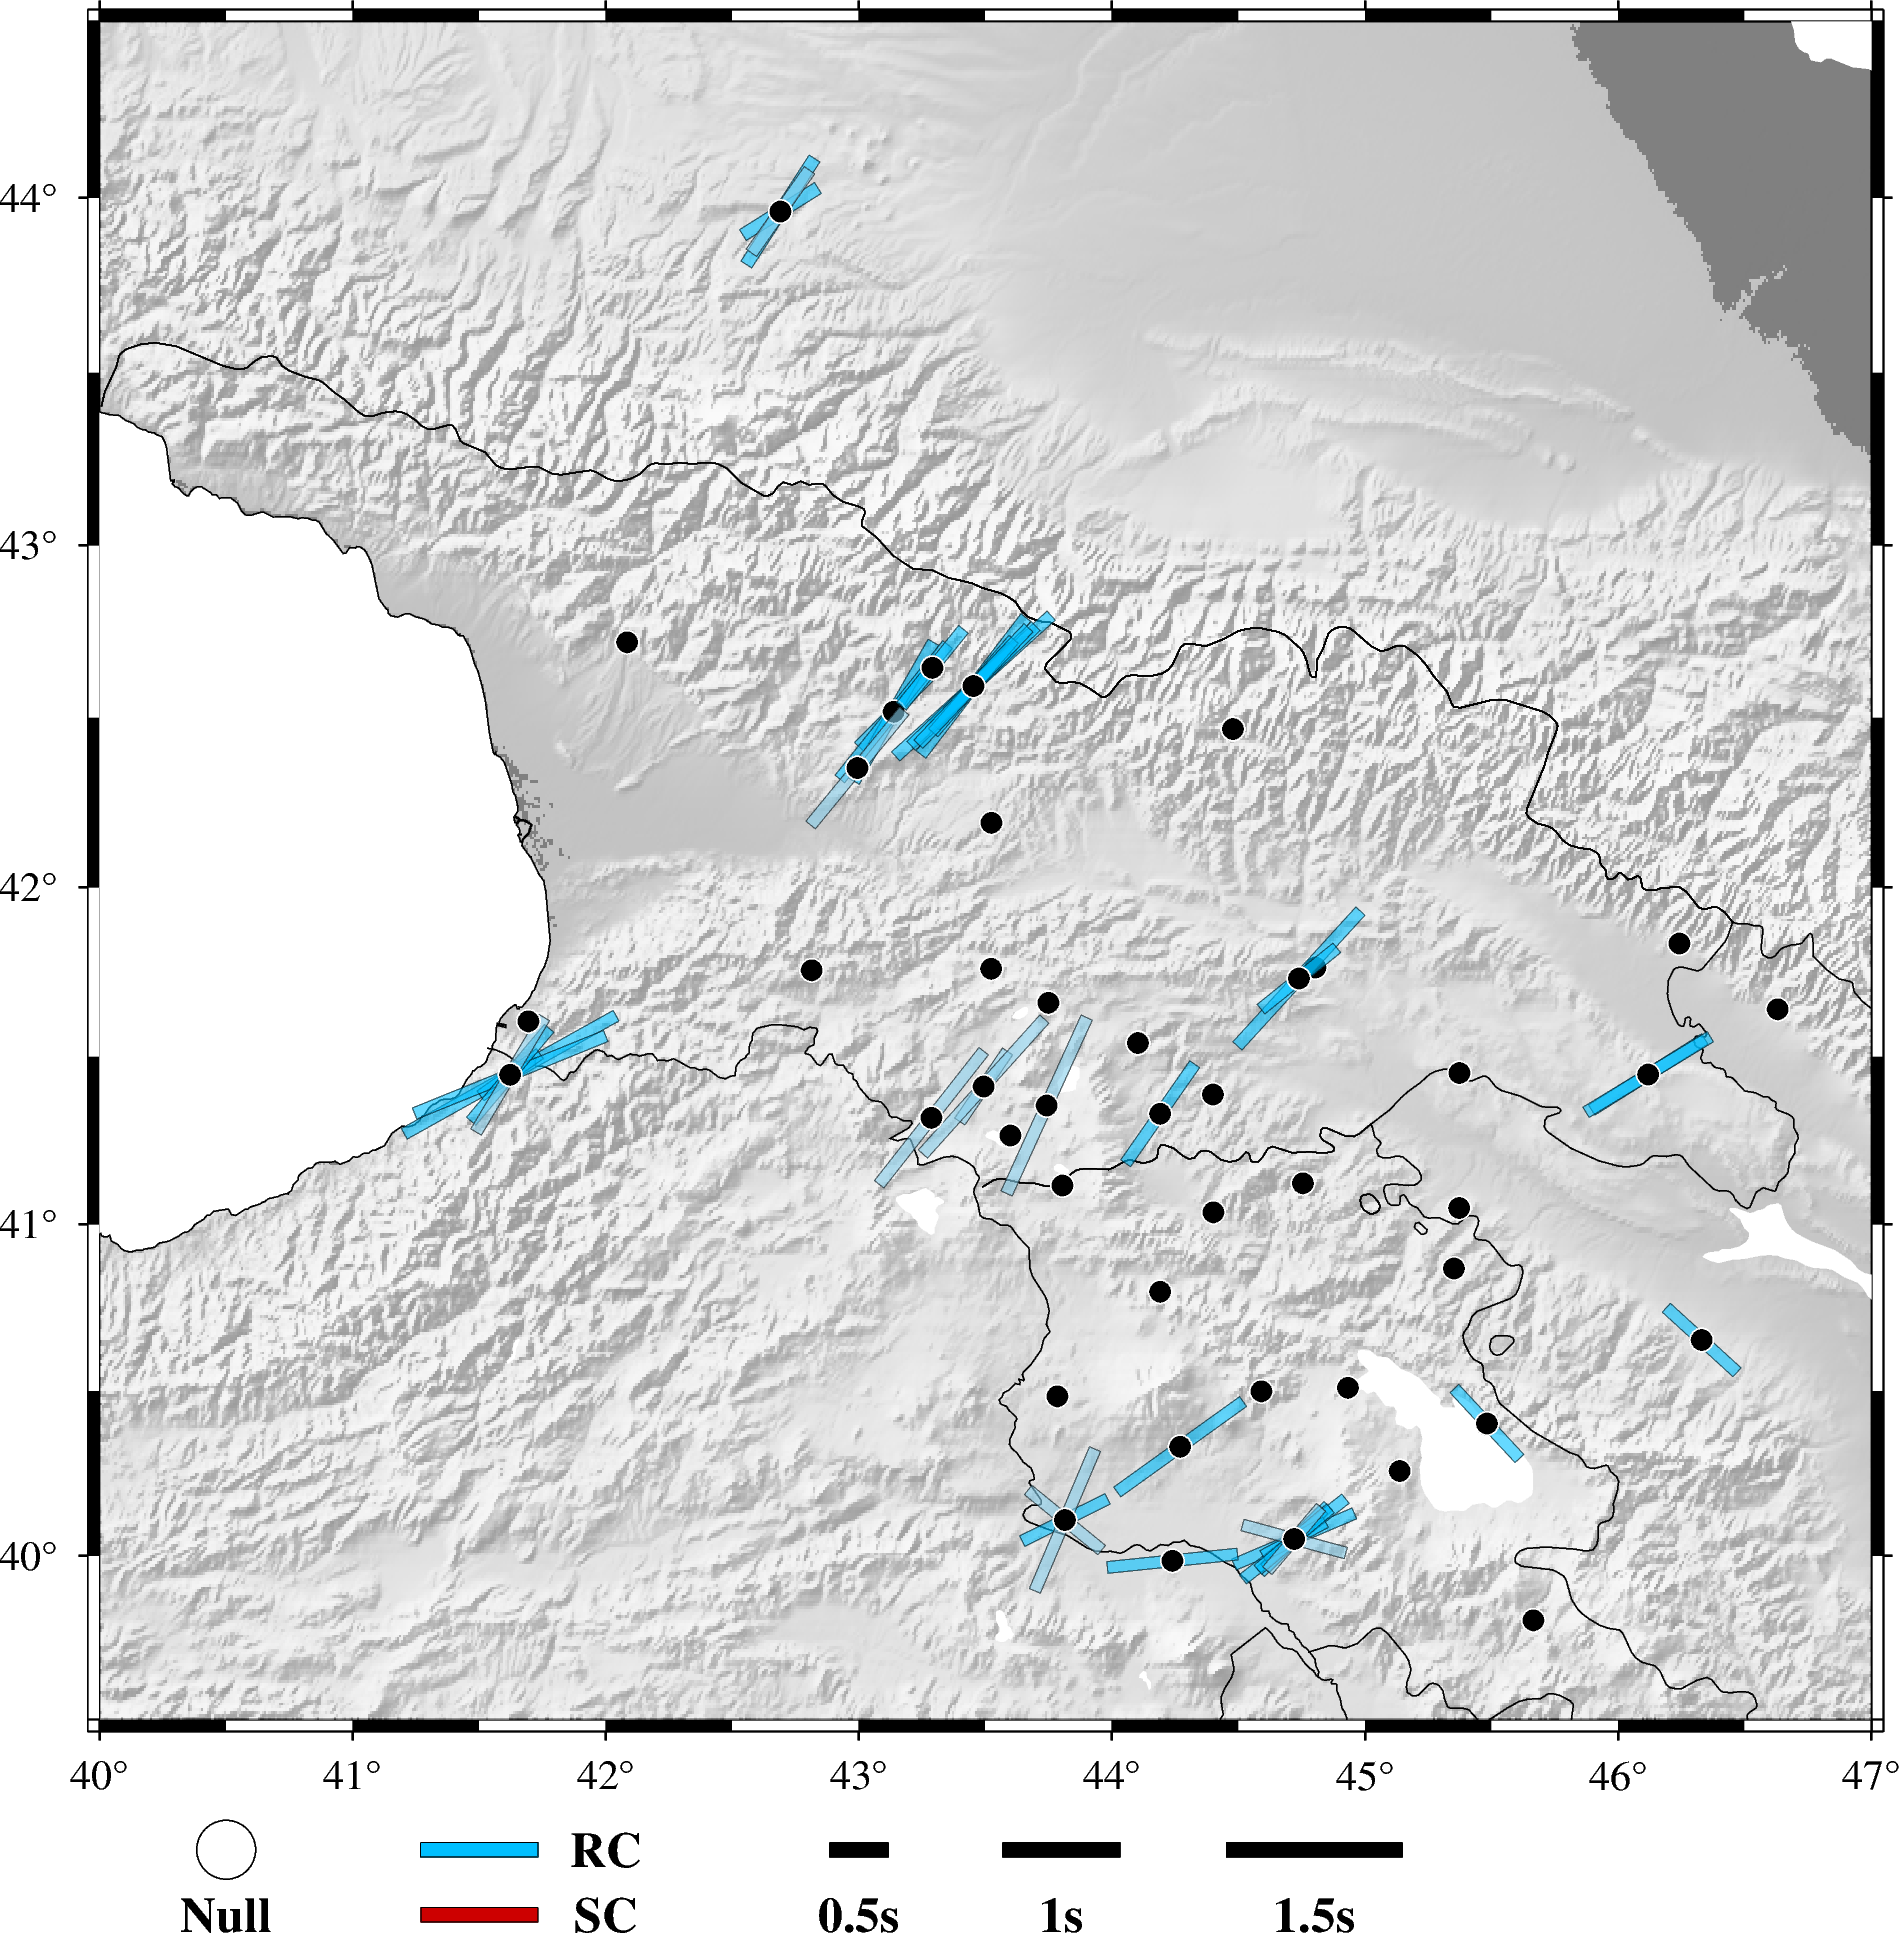

In [8]:
regvals = [40, 47, 39.5, 44.5]
figmap = pygmt.Figure()
PygmtBegin(figmap, regvals)

for pkl in sorted(glob.glob(f'{PKLpath}/*.pkl')):
    STApkl = pickle.load(open(pkl, "rb"))
    values = [value for keys, value in STApkl.items() ][0]
    net = values['network']; sta = values['station']
    st_lat = values['latitude']; st_lon = values['longitude']
    
    print(f'{net}.{sta}')
    
    for csvpath in glob.glob(f'{DATApath}/{net}.{sta}*csv'):
        phase = csvpath.rsplit('_')[4]
        if phase == 'SKS': SCcolor = 'red3'; RCcolor = 'deepskyblue1'
        elif phase == 'SKKS': SCcolor = 'violet'; RCcolor = 'skyblue'
        df = pd.read_csv(csvpath)
        dff = df[df['Pick']==True][df['Null']==False][df['Quality']=='Good'][df['SNRQ']>=5]   
        
        for i in range(len(dff)):
            if method == 'SC': 
                SCPhi = dff['SCPhi'].values[i]
                SCdt  = dff['SCdt'].values[i]    
                SCdata = [[st_lon, st_lat, SCPhi-90, 3, SCdt*40]]
                figmap.plot(data=SCdata, style="J", color=SCcolor, pen="0.02p,black",transparency=40)
            elif method == 'RC':
                RCPhi = dff['RCPhi'].values[i]
                RCdt  = dff['RCdt'].values[i]
                RCdata = [[st_lon, st_lat, RCPhi-90, 4, RCdt*40]]
                figmap.plot(data=RCdata, style="J", color=RCcolor, pen="0.02p,black",transparency=40)

    figmap.plot(x=st_lon, y=st_lat, style="c0.2c",color='black', pen="white")  
    
figmap.show()

In [11]:
for pkl in sorted(glob.glob(f'{PKLpath}/*BATM.pkl')):
    STApkl = pickle.load(open(pkl, "rb"))
    values = [value for keys, value in STApkl.items() ][0]
    net = values['network']; sta = values['station']
    st_lat = values['latitude']; st_lon = values['longitude']
    
    print(f'{net}.{sta}')
    
    for csvpath in glob.glob(f'{DATApath}/{net}.{sta}*csv'):
#         print(csvpath)
        phase = csvpath.rsplit('_')[4]
        if phase == 'SKS': SCcolor = 'red3'; RCcolor = 'deepskyblue1'
        elif phase == 'SKKS': SCcolor = 'violet'; RCcolor = 'skyblue'
        df = pd.read_csv(csvpath)
        dff = df[df['Pick']==True][df['Quality']!='Poor'][df['SNRQ']>=5][df['Null']==False]
        
        for i in range(len(dff)):
            Event = dff['Event'].values[i]
            if method == 'SC': 
                SCPhi = dff['SCPhi'].values[i]
                SCdt  = dff['SCdt'].values[i] 
                quality = dff['Quality'].values[i]
                print(f'{phase} {sta} {Event} {quality}')
            elif method == 'RC':
                RCPhi = dff['RCPhi'].values[i]
                RCdt  = dff['RCdt'].values[i]



TG.BATM
SKS BATM 20140412_201438 Fair
